<a href="https://colab.research.google.com/github/Anot11/TS_VAR/blob/main/TS_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels==0.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:

import csv
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from scipy import stats

from statsmodels.tsa.arima.model            import ARIMA
from statsmodels.tsa.vector_ar.vecm         import coint_johansen
from scipy                                  import stats
from statsmodels.tsa.stattools              import acf
from statsmodels.graphics.tsaplots          import plot_acf

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing                  import StandardScaler
from sklearn.metrics                        import mean_squared_error, mean_absolute_error
from sklearn.model_selection                import GridSearchCV, TimeSeriesSplit, cross_val_score, cross_validate
from sklearn.neural_network                 import MLPRegressor
from sklearn.ensemble                       import RandomForestRegressor
from sklearn.linear_model                   import LinearRegression, Lasso, RidgeCV


from pandas import read_csv

from pylab import rcParams

import numpy as np

from datetime                    import datetime
from statsmodels.tsa.stattools   import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf


from statsmodels.tsa.api                 import VAR
from statsmodels.tsa.stattools           import adfuller
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.ardl                import ARDL
from statsmodels.tsa.ardl import ardl_select_order

In [ ]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/data_train.csv')

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/data_test.csv')

In [ ]:
df_train

,Month,GS10,EXUSUKx,USCONS
0,1/01/1990,9.322005,0.394032,8.473021
1,1/02/1990,9.632165,0.451878,8.640938
2,1/03/1990,7.656738,0.367179,8.705040
3,1/04/1990,8.812280,0.412580,8.546146
4,1/05/1990,10.992067,0.522288,8.667838
...,...,...,...,...
355,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN
357,NaN,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN


In [ ]:
df_test.index = pd.date_range(start='2019-02', periods=10, freq='MS')
df_test.drop(['Month'], axis=1, inplace=True)

In [ ]:
df_test

,GS10,EXUSUKx,USCONS
2019-02-01,2.214484,0.226401,8.996948
2019-03-01,2.021801,0.172626,9.039967
2019-04-01,2.968596,0.188786,8.975907
2019-05-01,2.813438,0.153383,9.001451
2019-06-01,1.674241,0.194873,8.860219
2019-07-01,3.116371,0.242450,8.973032
2019-08-01,1.298880,0.161836,9.036925
2019-09-01,1.557615,0.192354,8.980973
2019-10-01,3.090388,0.346695,8.954072
2019-11-01,1.252976,0.339328,8.826249


In [ ]:
df_train.index = pd.date_range(start='1990-01', periods=360, freq='MS')
df_train.drop(['Month'], axis=1, inplace=True)

In [ ]:
df_train

,GS10,EXUSUKx,USCONS
1990-01-01,9.322005,0.394032,8.473021
1990-02-01,9.632165,0.451878,8.640938
1990-03-01,7.656738,0.367179,8.705040
1990-04-01,8.812280,0.412580,8.546146
1990-05-01,10.992067,0.522288,8.667838
...,...,...,...
2019-08-01,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN


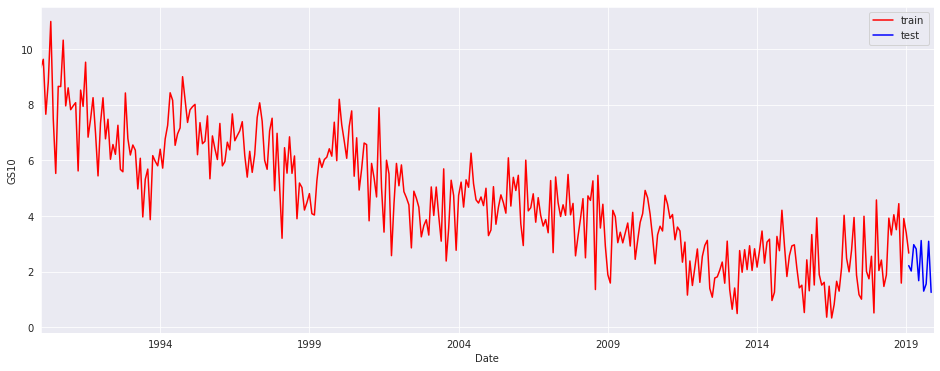

In [ ]:
#checking data
df_train['GS10'].plot(label='train',color='r')
df_test['GS10'].plot(label='test',color='b')

plt.ylabel("GS10")
plt.xlabel("GS10")
plt.legend()
plt.ylabel("GS10")
plt.xlabel("Date")
plt.show()


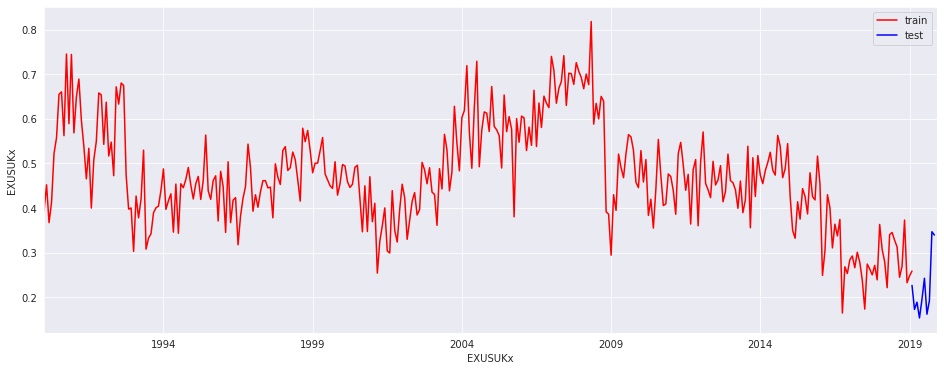

In [ ]:
#checking data
df_train['EXUSUKx'].plot(label='train',color='r')
df_test['EXUSUKx'].plot(label='test',color='b')

plt.ylabel("EXUSUKx")
plt.xlabel("EXUSUKx")
plt.legend()
plt.ylabel("EXUSUKx")
plt.xlabel("EXUSUKx")
plt.show()


In [ ]:

df_train = df_train.diff(1)
df_train = df_train.dropna()
df_train.head()


,GS10,EXUSUKx,USCONS
1990-02-01,0.310160,0.057846,0.167917
1990-03-01,-1.975427,-0.084699,0.064103
1990-04-01,1.155543,0.045400,-0.158894
1990-05-01,2.179787,0.109708,0.121692
1990-06-01,-3.500928,0.034866,0.055585


In [ ]:
df_train

,GS10,EXUSUKx,USCONS
1990-02-01,0.310160,0.057846,0.167917
1990-03-01,-1.975427,-0.084699,0.064103
1990-04-01,1.155543,0.045400,-0.158894
1990-05-01,2.179787,0.109708,0.121692
1990-06-01,-3.500928,0.034866,0.055585
...,...,...,...
2018-10-01,0.936511,0.024618,0.020495
2018-11-01,-2.855735,0.103687,-0.065843
2018-12-01,2.321612,-0.140526,-0.025421
2019-01-01,-0.523467,0.015182,0.101494


In [ ]:
#Rename the differenced variables
df_train = df_train.rename(columns={"GS10"   : "D1_GS10"})
df_train = df_train.rename(columns={"EXUSUKx"  : "D1_EXUSUKx"})
df_train = df_train.rename(columns={"USCONS": "D1_USCONS"})
df_train = df_train.dropna()

df_train


,D1_GS10,D1_EXUSUKx,D1_USCONS
1990-02-01,0.310160,0.057846,0.167917
1990-03-01,-1.975427,-0.084699,0.064103
1990-04-01,1.155543,0.045400,-0.158894
1990-05-01,2.179787,0.109708,0.121692
1990-06-01,-3.500928,0.034866,0.055585
...,...,...,...
2018-10-01,0.936511,0.024618,0.020495
2018-11-01,-2.855735,0.103687,-0.065843
2018-12-01,2.321612,-0.140526,-0.025421
2019-01-01,-0.523467,0.015182,0.101494


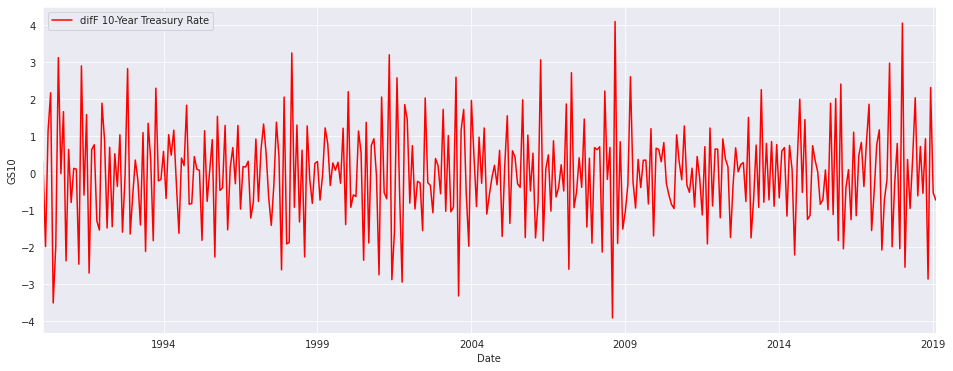

In [ ]:
df_train['D1_GS10'].plot(label='difF 10-Year Treasury Rate',color='r')


plt.legend()
plt.ylabel("GS10")
plt.xlabel("Date")
plt.show()


In [ ]:
 #ARIMA (1,1,1)


mod = ARIMA(df_train['D1_GS10'], order=(1,1,1))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                D1_GS10   No. Observations:                  349
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -549.085
Date:                Mon, 24 Oct 2022   AIC                           1104.169
Time:                        04:21:06   BIC                           1115.726
Sample:                    02-01-1990   HQIC                          1108.770
                         - 02-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5009      0.044    -11.500      0.000      -0.586      -0.416
ma.L1         -0.9999      2.372     -0.422      0.673      -5.649       3.649
sigma2         1.3471      3.190      0.422      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                D1_GS10   No. Observations:                  349
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -513.657
Date:                Mon, 24 Oct 2022   AIC                           1037.314
Time:                        04:21:07   BIC                           1056.575
Sample:                    02-01-1990   HQIC                          1044.982
                         - 02-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0547      0.082     -0.667      0.504      -0.215       0.106
ar.L2         -0.0136      0.066     -0.206      0.837      -0.143       0.116
ma.L1         -1.7496      0.516     -3.390      0.0

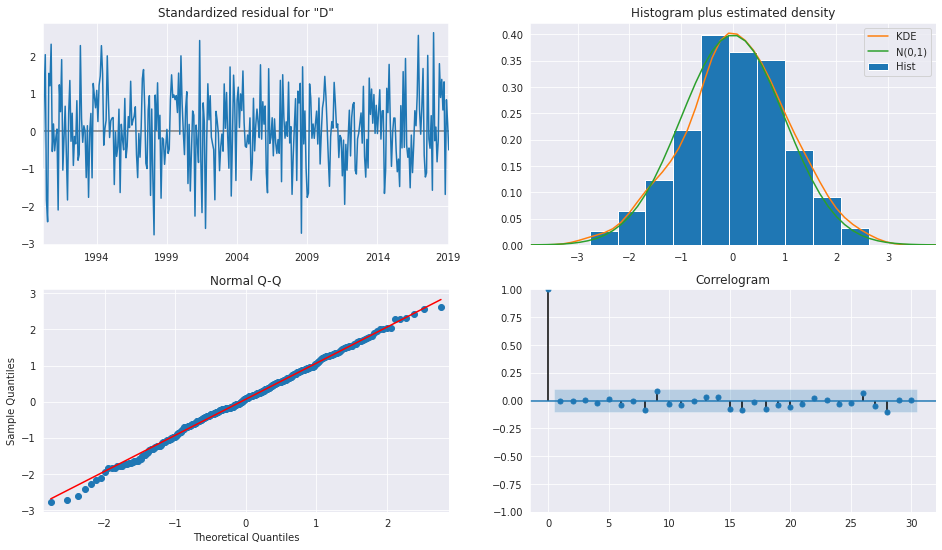

In [ ]:
#ARIMA (2,1,2)
#the best for GS10


mod = ARIMA(df_train['D1_GS10'], order=(2,1,2))
res_212 = mod.fit()
print(res_212.summary())

fig = plt.figure(figsize=(16,9))
fig = res_212.plot_diagnostics(fig=fig, lags=30)


In [ ]:
#10-Year Treasury Rate (GS10) (ARIMA 212) apply the Ljung and Box test

sm.stats.acorr_ljungbox(res_212.resid, lags=[30], return_df=True)

,lb_stat,lb_pvalue
30,22.897403,0.819454


In [ ]:
#ARIMA (3,1,2)


mod = ARIMA(df_train['D1_GS10'], order=(3,1,2))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                D1_GS10   No. Observations:                  349
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -528.604
Date:                Mon, 24 Oct 2022   AIC                           1069.209
Time:                        04:21:09   BIC                           1092.322
Sample:                    02-01-1990   HQIC                          1078.410
                         - 02-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6182      0.152    -10.649      0.000      -1.916      -1.320
ar.L2         -0.9615      0.129     -7.450      0.000      -1.214      -0.709
ar.L3         -0.3045      0.073     -4.177      0.0

In [ ]:
#ARIMA (3,1,3)


mod = ARIMA(df_train['D1_GS10'], order=(3,1,3))
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                D1_GS10   No. Observations:                  349
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -512.417
Date:                Mon, 24 Oct 2022   AIC                           1038.835
Time:                        04:21:11   BIC                           1065.800
Sample:                    02-01-1990   HQIC                          1049.570
                         - 02-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9639      0.132     -7.283      0.000      -1.223      -0.705
ar.L2         -0.0327      0.121     -0.270      0.787      -0.270       0.205
ar.L3          0.0322      0.068      0.476      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:             D1_EXUSUKx   No. Observations:                  349
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 423.713
Date:                Mon, 24 Oct 2022   AIC                           -839.425
Time:                        04:21:11   BIC                           -824.016
Sample:                    02-01-1990   HQIC                          -833.291
                         - 02-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5181      0.049    -10.618      0.000      -0.614      -0.422
ar.L2         -0.2227      0.048     -4.626      0.000      -0.317      -0.128
ma.L1         -1.0000      4.334     -0.231      0.8

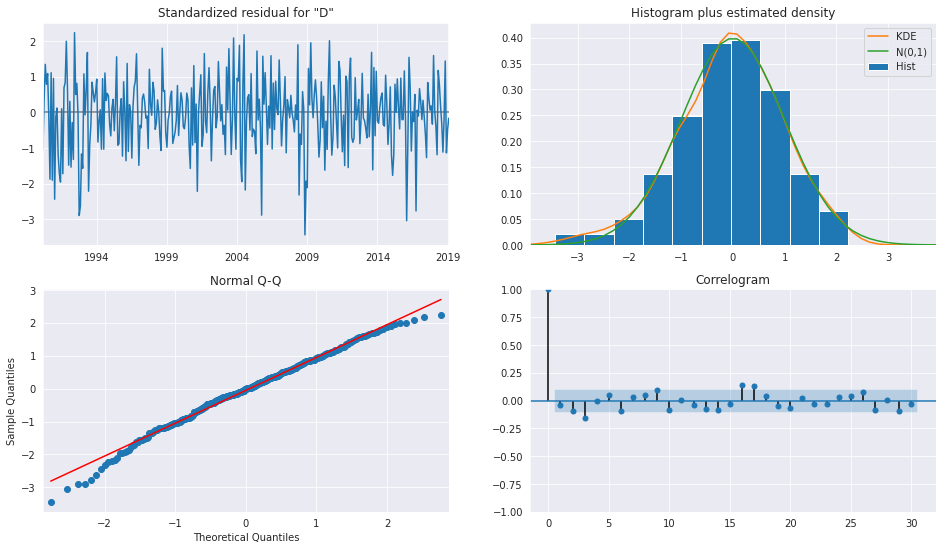

In [ ]:
# first difference EXUSUKx ARIMA (2,1,1)
#best

mod = ARIMA(df_train['D1_EXUSUKx'], order=(2,1,1))
res_ex211 = mod.fit()
print(res_ex211.summary())

fig = plt.figure(figsize=(16,9))
fig = res_ex211.plot_diagnostics(fig=fig, lags=30)

In [ ]:
# US/UK Foreign Exchange Rate (ARIMA 211) apply the Ljung and Box test

sm.stats.acorr_ljungbox(res_ex211.resid, lags=[50], return_df=True)

,lb_stat,lb_pvalue
50,76.027724,0.010258


#Model all three series with a VAR model

In [ ]:
#cointegration test

In [ ]:
def cointegration_test(df_train, alpha=0.05):

    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df_train,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df_train.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)



In [ ]:
cointegration_test(df_train)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
D1_GS10 ::  356.27    > 24.2761   =>   True
D1_EXUSUKx ::  210.69    > 12.3212   =>   True
D1_USCONS ::  88.17     > 4.1296    =>   True


# Selecting best VAR model

In [ ]:
#VAR
def var_est(df_train,i):

    print("---------------------------------------------")
    print("VAR result for max lag = " + str(i))
    print("---------------------------------------------")

    model  = VAR(df_train)
    result = model.fit(i, trend='c')

    print(result.summary())

    print("---------------------------------------------")
    print("Plotting input time series")
    print("---------------------------------------------")

    result.plot()
    plt.show()

    print("---------------------------------------------")
    print("Plotting time series autocorrelation function")
    print("---------------------------------------------")

    result.plot_acorr()
    plt.show()

    print("---------------------------------------------")
    print("Plotting IRF")
    print("---------------------------------------------")

    irf = result.irf(10)
    irf.plot(orth=False)
    plt.show()

    print("---------------------------------------------")
    print("Plotting cumulative effects")
    print("---------------------------------------------")

    irf.plot_cum_effects(orth=False)
    plt.show()

    print("---------------------------------------------")
    print("Granger test")
    print("---------------------------------------------")

    test_result1 = result.test_causality('D1_GS10',['D1_EXUSUKx', 'D1_USCONS'], kind='f')
    print(test_result1.summary())


    test_result2 = result.test_causality('D1_USCONS', ['D1_GS10', 'D1_EXUSUKx'], kind='f')
    print(test_result2.summary())

    test_result3 = result.test_causality('D1_EXUSUKx', ['D1_USCONS', 'D1_GS10'], kind='f')
    print(test_result3.summary())

    print("---------------------------------------------")
    print("Ljung-Box test for VAR")
    print("---------------------------------------------")
    test_result4 = result.test_whiteness()
    print(test_result4.summary())

In [ ]:
#Selecting best VAR lag

In [ ]:
model = VAR(df_train)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -9.715087292094255
BIC :  -9.58225272382617
FPE :  6.0366016344988186e-05
HQIC:  -9.662203286393739 

Lag Order = 2
AIC :  -9.956896569350581
BIC :  -9.72394031465639
FPE :  4.7400387852391066e-05
HQIC:  -9.864142385607833 

Lag Order = 3
AIC :  -10.006152968230072
BIC :  -9.672646716057438
FPE :  4.512362285670606e-05
HQIC:  -9.873349606471235 

Lag Order = 4
AIC :  -10.056189597877468
BIC :  -9.621701968126096
FPE :  4.29238689082791e-05
HQIC:  -9.883156764225012 

Lag Order = 5
AIC :  -10.091999945518646
BIC :  -9.556096458443289
FPE :  4.1417856911511475e-05
HQIC:  -9.878556039385865 



In [ ]:
#another method


In [ ]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-9.074,-9.040,0.0001147,-9.060
1,-9.801,-9.665,5.537e-05,-9.747
2,-10.03,-9.793*,4.401e-05,-9.936
3,-10.09,-9.747,4.160e-05,-9.952*
4,-10.13,-9.685,3.998e-05,-9.951
5,-10.15,-9.609,3.896e-05,-9.936
6,-10.16*,-9.518,3.853e-05*,-9.907
7,-10.13,-9.386,3.973e-05,-9.836
8,-10.15,-9.298,3.919e-05,-9.809
9,-10.12,-9.166,4.038e-05,-9.739


##selecting VAR(2), since it has the lowest BIC

---------------------------------------------
VAR result for max lag = 2
---------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Oct, 2022
Time:                     04:21:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.72394
Nobs:                     347.000    HQIC:                  -9.86414
Log likelihood:           271.407    FPE:                4.74004e-05
AIC:                     -9.95690    Det(Omega_mle):     4.46437e-05
--------------------------------------------------------------------
Results for equation D1_GS10
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.033180         0.058641           -0.566           0.572
L1.D1_GS10          

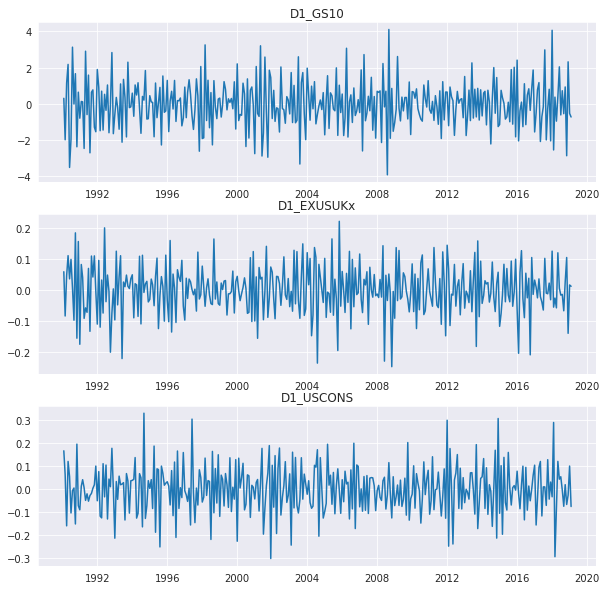

---------------------------------------------
Plotting time series autocorrelation function
---------------------------------------------


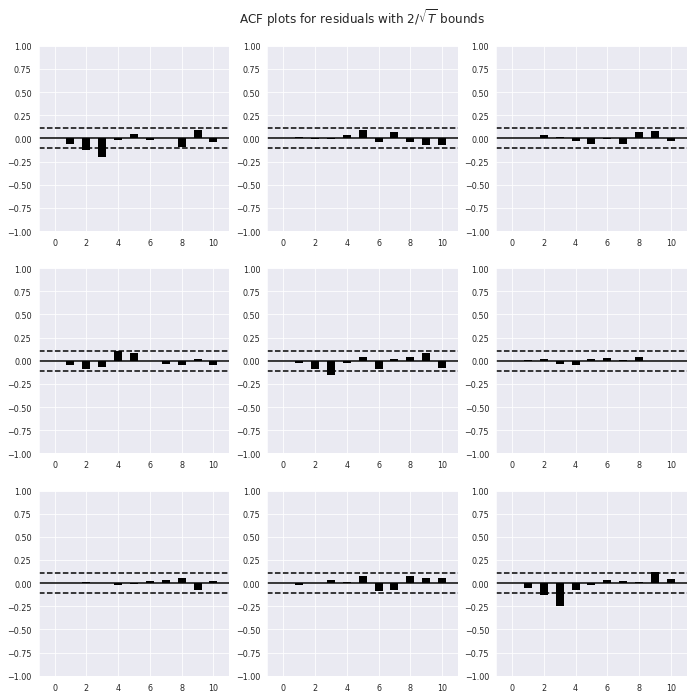

---------------------------------------------
Plotting IRF
---------------------------------------------


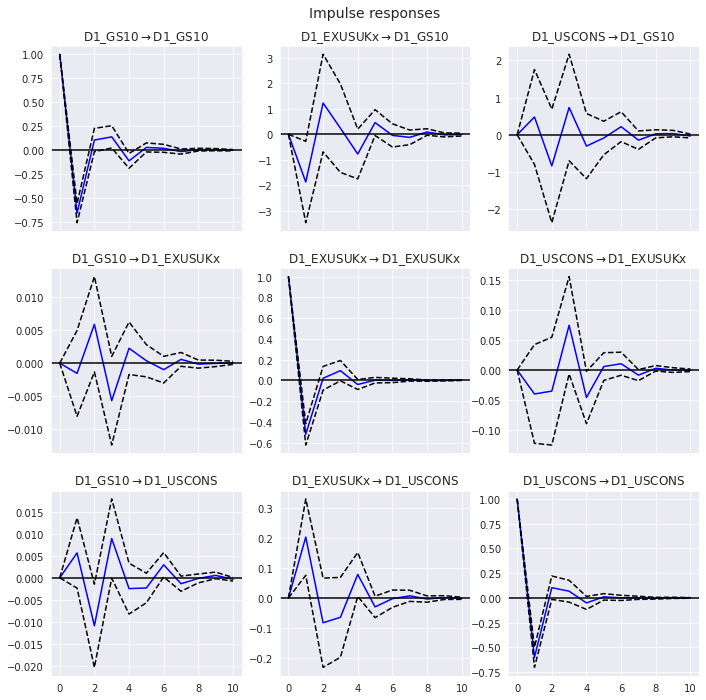

---------------------------------------------
Plotting cumulative effects
---------------------------------------------


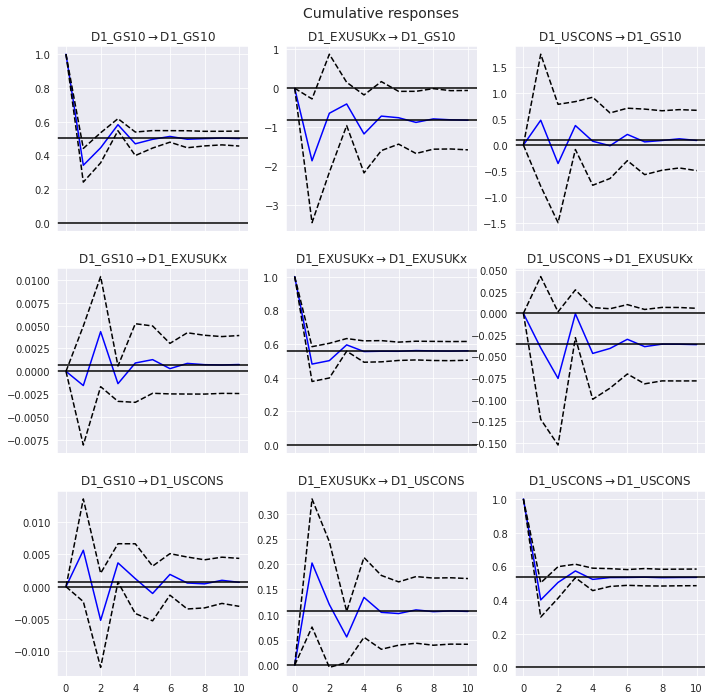

---------------------------------------------
Granger test
---------------------------------------------
Granger causality F-test. H_0: ['D1_EXUSUKx', 'D1_USCONS'] do not Granger-cause D1_GS10. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         1.708          2.381   0.146 (4, 1020)
-----------------------------------------------
Granger causality F-test. H_0: ['D1_GS10', 'D1_EXUSUKx'] do not Granger-cause D1_USCONS. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         4.220          2.381   0.002 (4, 1020)
-----------------------------------------------
Granger causality F-test. H_0: ['D1_USCONS', 'D1_GS10'] do not Granger-cause D1_EXUSUKx. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
---------------------------------

In [ ]:
var_est(df_train,2)

---------------------------------------------
VAR result for lag = 2
---------------------------------------------
<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 2, BIC -> 2, FPE -> 2, HQIC ->  2>
Using 2 based on bic criterion
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Oct, 2022
Time:                     04:21:38
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.72394
Nobs:                     347.000    HQIC:                  -9.86414
Log likelihood:           271.407    FPE:                4.74004e-05
AIC:                     -9.95690    Det(Omega_mle):     4.46437e-05
--------------------------------------------------------------------
Results for equation D1_GS10
                   coefficient       std. error           t-stat            prob
-------------------------------

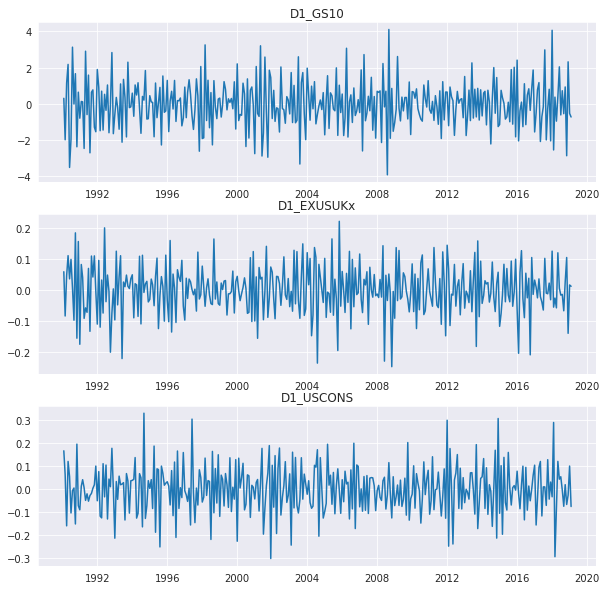

---------------------------------------------
Plotting time series autocorrelation function
---------------------------------------------


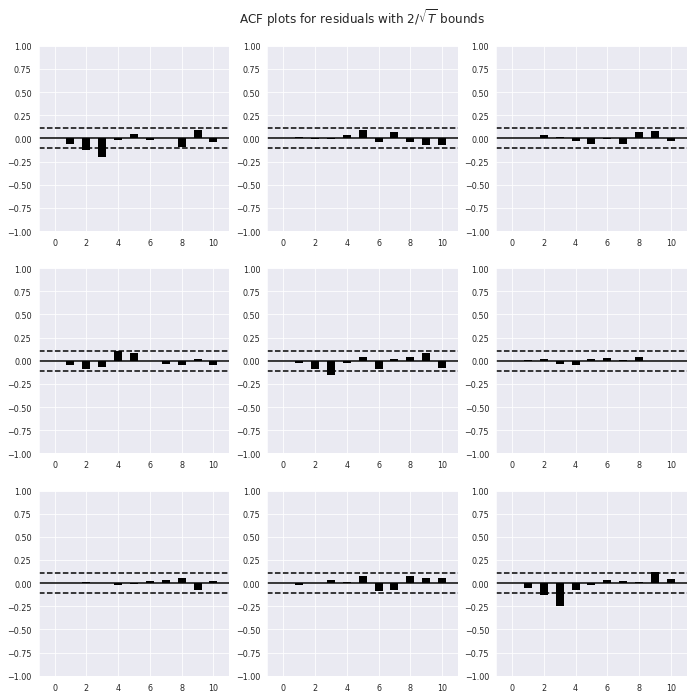

---------------------------------------------
Plotting IRF
---------------------------------------------


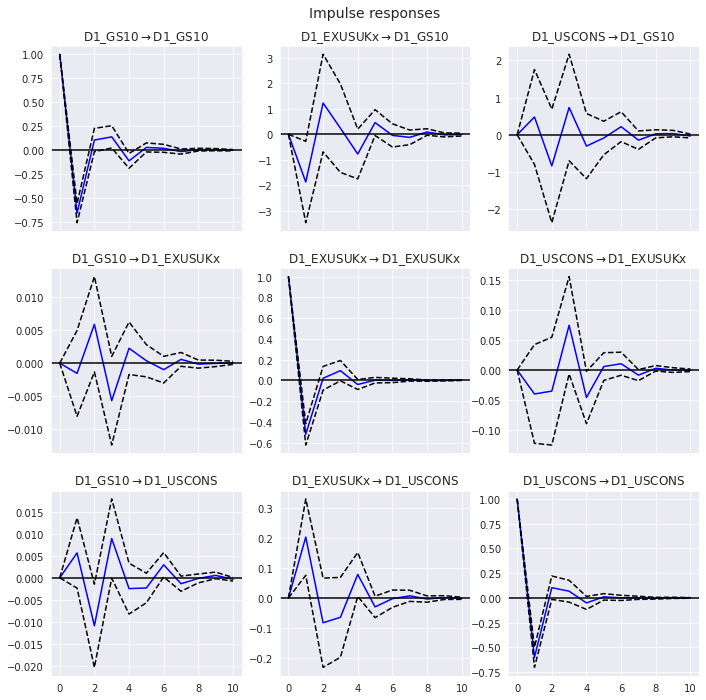

---------------------------------------------
Plotting cumulative effects
---------------------------------------------


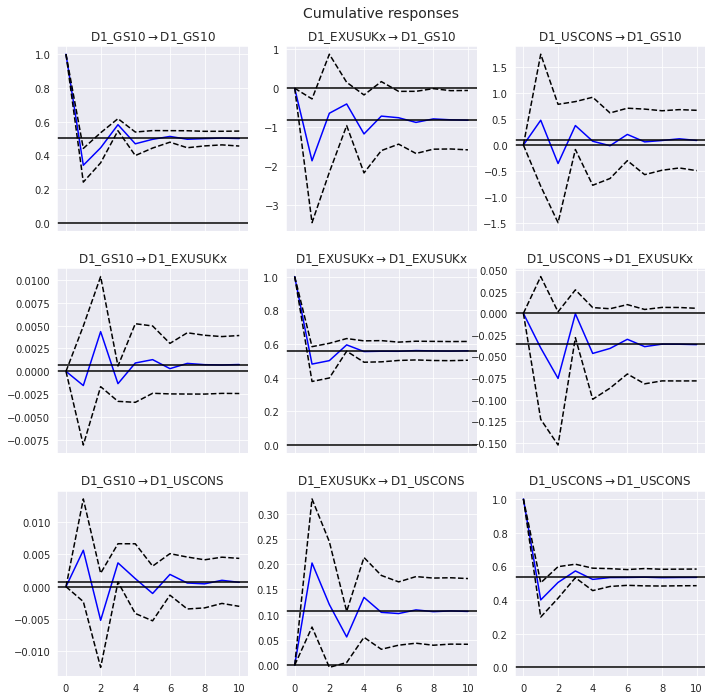

---------------------------------------------
Granger test
---------------------------------------------
Granger causality F-test. H_0: ['D1_EXUSUKx', 'D1_USCONS'] do not Granger-cause D1_GS10. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         1.708          2.381   0.146 (4, 1020)
-----------------------------------------------
Granger causality F-test. H_0: ['D1_GS10', 'D1_EXUSUKx'] do not Granger-cause D1_USCONS. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         4.220          2.381   0.002 (4, 1020)
-----------------------------------------------
Granger causality F-test. H_0: ['D1_USCONS', 'D1_GS10'] do not Granger-cause D1_EXUSUKx. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
---------------------------------

In [ ]:
var_est_BIC(df_train,2)

In [ ]:
#BIC &VAR

def var_est_BIC(df_train,i):

    print("---------------------------------------------")
    print("VAR result for lag = " + str(i))
    print("---------------------------------------------")

    model  = VAR(df_train)
    result = model.fit(maxlags=i, ic='bic', trend='c',verbose=True)

    print(result.summary())

    print("---------------------------------------------")
    print("Plotting input time series")
    print("---------------------------------------------")

    result.plot()
    plt.show()

    print("---------------------------------------------")
    print("Plotting time series autocorrelation function")
    print("---------------------------------------------")

    result.plot_acorr()
    plt.show()

    print("---------------------------------------------")
    print("Plotting IRF")
    print("---------------------------------------------")

    irf = result.irf(10)
    irf.plot(orth=False)
    plt.show()

    print("---------------------------------------------")
    print("Plotting cumulative effects")
    print("---------------------------------------------")

    irf.plot_cum_effects(orth=False)
    plt.show()

    print("---------------------------------------------")
    print("Granger test")
    print("---------------------------------------------")

    test_result1 = result.test_causality('D1_GS10',['D1_EXUSUKx', 'D1_USCONS'], kind='f')
    print(test_result1.summary())

    test_result2 = result.test_causality('D1_USCONS', ['D1_GS10', 'D1_EXUSUKx'], kind='f')
    print(test_result2.summary())

    test_result3 = result.test_causality('D1_EXUSUKx', ['D1_USCONS', 'D1_GS10'], kind='f')
    print(test_result3.summary())

    print("---------------------------------------------")
    print("Ljung-Box test for VAR")
    print("---------------------------------------------")
    test_result4 = result.test_whiteness()
    print(test_result4.summary())

# Other VAR

In [ ]:
var_est(df_train,1)

In [ ]:
var_est_BIC(df_train,1)

#the forecast value of VAR (2)

In [ ]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Oct, 2022
Time:                     04:21:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.72394
Nobs:                     347.000    HQIC:                  -9.86414
Log likelihood:           271.407    FPE:                4.74004e-05
AIC:                     -9.95690    Det(Omega_mle):     4.46437e-05
--------------------------------------------------------------------
Results for equation D1_GS10
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.033180         0.058641           -0.566           0.572
L1.D1_GS10           -0.659211         0.050993          -12.927           0.000
L1.D1_EXUSUKx        -1.866405         0.812568           

In [ ]:
# We plot the forecast of the model for 10 periods
model  = VAR(df_train)
result = model.fit(2)
lag_order = result.k_ar


result.forecast(df_train.values[-lag_order:],10,)
Var2=result.forecast(df_train.values[-lag_order:],10,)

In [ ]:
print(Var2)

[[ 5.13805774e-01 -1.61896067e-02  2.30702892e-02]
 [-7.71727430e-02  6.27865139e-03  1.00509932e-02]
 [-1.51792072e-01  1.94242350e-04 -1.38681012e-02]
 [ 7.60112967e-02 -2.55479162e-03  7.59110400e-03]
 [-1.97581532e-02  7.26922048e-04  7.59803651e-04]
 [-4.63134630e-02 -6.13340489e-04 -1.60368152e-03]
 [ 3.36057761e-03 -4.50319529e-04  1.93961391e-03]
 [-1.68927575e-02 -3.52588105e-04  6.04961289e-04]
 [-2.23399997e-02 -4.26982004e-04  2.77467388e-04]
 [-1.16475971e-02 -3.71423661e-04  8.46945803e-04]]


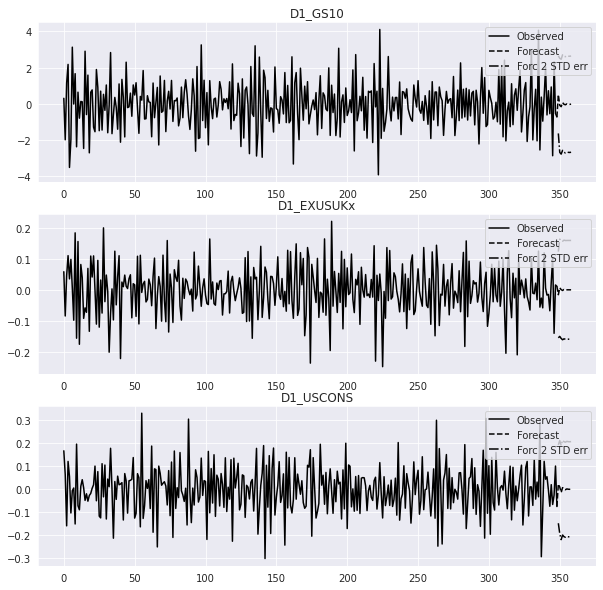

In [ ]:
#Visualising the forecast

forecast = result.plot_forecast(10)


In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # Mean Asolute Percentage Error
    me = np.mean(forecast - actual)                           # Mean Error
    mae = np.mean(np.abs(forecast - actual))                  # Mean Absolute Error
    mpe = np.mean((forecast - actual)/actual)                 # Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5                # Root-Mean Square Error
    corr = np.corrcoef(forecast, actual)[0,1]                 # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)                           # minmax`
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})